In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

#### Aim
Examine the rate of electricity generation in different countries over time

In [2]:
elec = pd.read_csv("electricity_generation_per_person.csv")

In [3]:
elec.head()

,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,544.0,559.0,532.0,568.0,607.0,621.0,653.0,673,699,...,1090,1150,1220,1270,1440,1530,1560,1640,1730,1730
1,Argentina,1490.0,1590.0,1660.0,1670.0,1580.0,1560.0,1620.0,1680,1810,...,2880,3190,3180,3210,3110,3230,3280,3290,3350,3350
2,Australia,7860.0,8100.0,8360.0,8670.0,9020.0,9130.0,9150.0,9230,9350,...,11600,11500,11500,11300,11400,11000,10800,10500,10600,10600
3,Austria,5850.0,5860.0,6610.0,6400.0,6530.0,6530.0,6620.0,6540,6670,...,7800,8030,8250,8450,7780,8500,7930,7540,7480,7760
4,Azerbaijan,3110.0,3180.0,3320.0,3360.0,3270.0,3200.0,3170.0,2630,2520,...,2500,2450,2110,2070,2220,2480,2490,2600,2570,2570


In [4]:
#make country categorical variable into numerical value
#elec['country'] = pd.Categorical(elec['country'])

In [5]:
len(elec.loc[0].values[1:])

32

In [6]:
len(np.arange(1985,2016))

31

### 1st attempt to plot Electricity Generated vs Time 

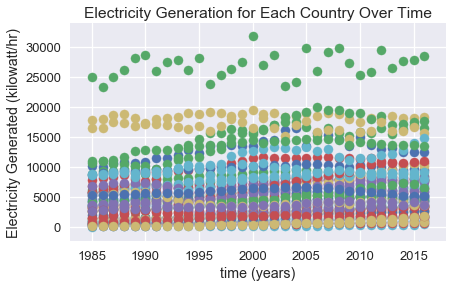

In [7]:
#time vs electricity generation
for i in range(len(elec)):
    plt.scatter(np.arange(1985, 2017), elec.loc[i].values[1:])
plt.title('Electricity Generation for Each Country Over Time')
plt.xlabel('time (years)')
plt.ylabel('Electricity Generated (kilowatt/hr)');

### 2nd Attempt: Construct Hans Rosling Plot

In [8]:
pop = pd.read_csv('urban_population.csv')
pop.head()

FileNotFoundError: File b'urban_population.csv' does not exist

In [ ]:
#select only from years 1985-2016
pop = pop.drop(pop.columns[np.arange(25)+1], axis = 1)
len(pop)

In [ ]:
len(elec)

In [ ]:
#year_x = electricity generated
#year_y = population
#merged on electricity generated countries data to get population for only countries in that data
merged = elec.merge(pop, how = 'left', left_on = 'country', right_on = 'country').set_index('country')
merged.head()

In [ ]:
pop_vals = merged.loc[:, '1985_y': '2016_y']
pop_vals.head()

In [ ]:
elec_vals = merged.loc[:, '1985_x': '2016_x']
elec_vals.head()

In [ ]:
set_x = pop_vals.iloc[0]
set_x.head()

In [ ]:
c=merged.index
np.array(c)

In [ ]:
pop_vals.iloc[:, 0].head()

In [ ]:
for i in range(len(pop_vals)):
    for j in range(len(elec_vals)):
        set_x = pop_vals.iloc[i]
        set_y = elec_vals.iloc[j]
        plt.scatter(set_x, set_y, s = 1, cmap = 'Accent', alpha = 0.6, linewidth = 2)
        
plt.xlabel("Population")
plt.ylabel("Electricity Generation per Person")
plt.title("Electricity Generation per Person in Each Country");

In [ ]:
convert -delay 80 Gapminder*.png animated_gapminder.gif